<a href="https://colab.research.google.com/github/yurehfarias/treino/blob/main/Imersao_python_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# baixar dados dos ultimos quatro anos para uma açao especifica
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()

In [5]:
# Vamos dividir os dados em treino (ate o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino= dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [7]:
# preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': "ds", "Close": 'y'})

In [8]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpncqcnkud/hhwesylu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncqcnkud/yzk0ft1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25720', 'data', 'file=/tmp/tmpncqcnkud/hhwesylu.json', 'init=/tmp/tmpncqcnkud/yzk0ft1_.json', 'output', 'file=/tmp/tmpncqcnkud/prophet_model5ax81cff/prophet_model-20240401212745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# Criar datas futuras para previsao ate o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

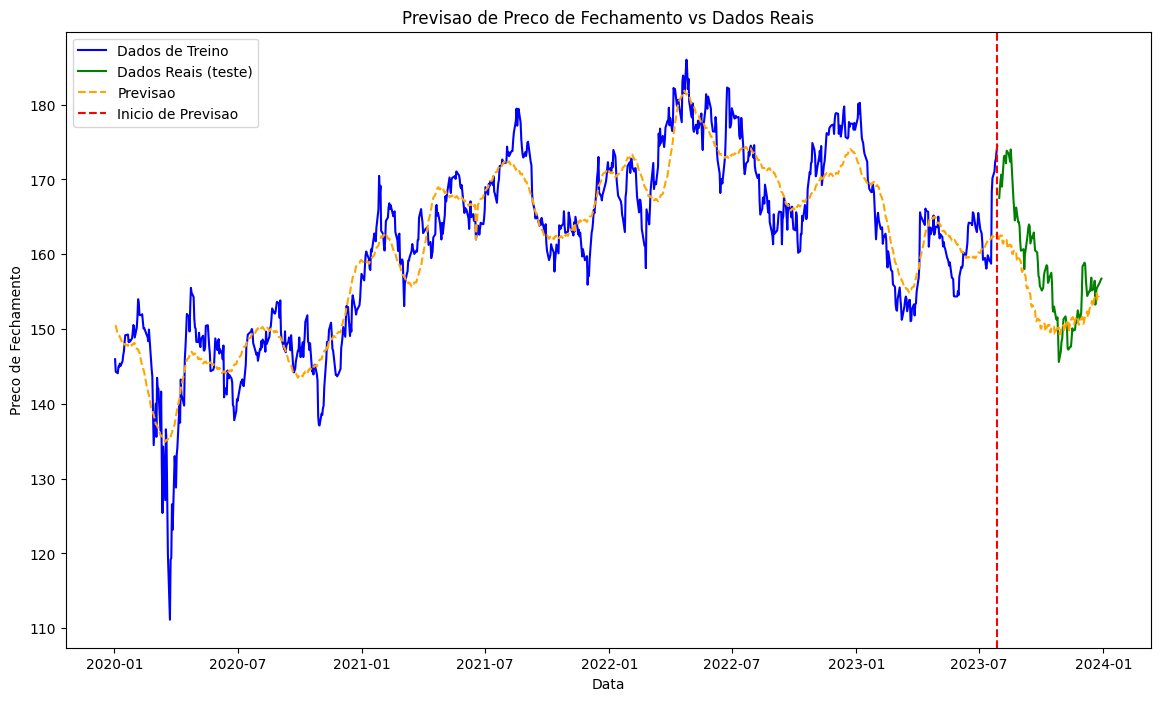

In [10]:
# plotar os dados de treino, teste e previsao
plt.figure(figsize = (14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label = 'Dados de Treino', color= 'Blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label = 'Dados Reais (teste)', color= 'Green')
plt.plot(previsao['ds'], previsao['yhat'], label = 'Previsao', color='orange', linestyle= '--')

plt.axvline(dados_treino['Date'].max(), color = 'red', linestyle= '--', label= 'Inicio de Previsao')
plt.xlabel('Data')
plt.ylabel('Preco de Fechamento')
plt.title('Previsao de Preco de Fechamento vs Dados Reais')
plt.legend()
plt.show()